In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tqdm
import cv2
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import joblib
import torch
import yaml



## Get ground truth json file to get image name and bounding boxes

In [110]:
import json
img_dir = './dataset/wider_face/test/images/'
gt_file = './dataset/processed/test.json'
gt_dict = json.load(open(gt_file))
ground_truth = {}
for img_path in gt_dict.keys():
    img_name = img_path.split("/")[-1]
    ground_truth[img_name] = gt_dict[img_path]

ground_truth

{'0_Parade_marchingband_1_465.jpg': [[345, 211, 4, 4],
  [331, 126, 3, 3],
  [250, 126, 3, 4],
  [221, 128, 4, 5],
  [427, 116, 3, 4],
  [393, 79, 3, 4],
  [373, 119, 3, 4],
  [90, 225, 6, 5],
  [128, 237, 5, 8],
  [170, 230, 5, 6],
  [114, 285, 5, 7],
  [81, 304, 9, 9],
  [44, 303, 10, 8],
  [7, 264, 6, 8],
  [31, 231, 5, 6],
  [26, 192, 6, 8],
  [66, 196, 4, 6],
  [74, 175, 5, 5],
  [113, 168, 4, 5],
  [129, 165, 4, 5],
  [158, 162, 4, 4],
  [174, 156, 5, 6],
  [197, 159, 4, 4],
  [192, 191, 3, 5],
  [242, 179, 5, 6],
  [161, 269, 5, 6],
  [0, 317, 3, 8],
  [346, 68, 3, 4],
  [418, 62, 2, 3],
  [376, 59, 3, 3],
  [120, 599, 12, 17],
  [1008, 256, 6, 10],
  [853, 131, 4, 5],
  [878, 131, 5, 5],
  [900, 138, 4, 6],
  [922, 142, 5, 5],
  [936, 139, 5, 6],
  [959, 134, 5, 7],
  [984, 141, 5, 5],
  [1010, 141, 4, 6],
  [877, 168, 7, 9],
  [947, 160, 5, 7],
  [963, 190, 5, 7],
  [982, 194, 5, 7],
  [798, 133, 4, 4],
  [815, 170, 4, 5],
  [794, 166, 4, 6],
  [845, 167, 4, 7],
  [839, 145, 3

## Now, we import our trained models for testing

### HOG SVM

In [111]:
from svm import svm_detect
from SSD.detect import detect_ssd
from faster_rcnn.detect import faster_rcnn_detect

In [112]:
svm_model = joblib.load("./model/svm/svm_hard_negative.pkl")


### Faster RCNN

In [113]:
from faster_rcnn.model import get_object_detection_model

with open("./config/fasterrcnn.yaml", "r") as f:
    config = yaml.safe_load(f)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


checkpoint = config['checkpoint']
print(checkpoint)
checkpoint = torch.load(checkpoint)

faster_rcnn_model =  get_object_detection_model(num_classes = 2)
faster_rcnn_model.load_state_dict(checkpoint['model'])
faster_rcnn_model = faster_rcnn_model.to(device)

./model/checkpoint_fasterrcnn.pth.tar


### SSD

In [114]:
from SSD.model import SSD300

with open("./config/ssd.yaml", "r") as f:
    config = yaml.safe_load(f)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


checkpoint = config['checkpoint']
checkpoint = torch.load(checkpoint)

model =  SSD300(n_classes=2)
model.load_state_dict(checkpoint['model'])
model = model.to(device)
print(config)



Loaded base model.

{'checkpoint': './model/checkpoint_ssd300.pth.tar', 'batch_size': 16, 'iterations': 60000, 'workers': 2, 'print_freq': 200, 'lr': '1e-4', 'momentum': 0.9, 'decay_lr_at': [40000, 50000], 'decay_lr_to': 0.1, 'weight_decay': '5e-4', 'n_classes': 2}


## Next, we demo our models on some image

### Let's start with some easy images first

['13_Interview_Interview_Sequences_13_33.jpg', '12_Group_Group_12_Group_Group_12_84.jpg', '11_Meeting_Meeting_11_Meeting_Meeting_11_639.jpg', 'desktop.ini']


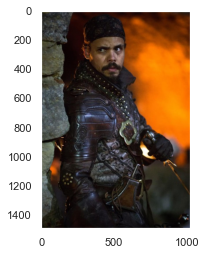

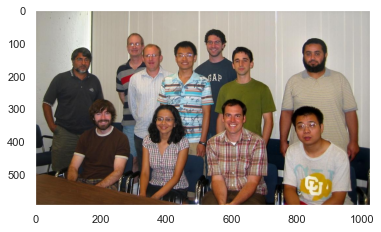

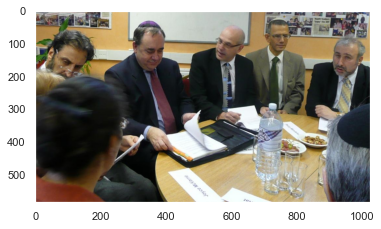

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [117]:
easy_im_paths = os.listdir("./demo_images/easy")
print(easy_im_paths)
for img_name in easy_im_paths:
    img_path = os.path.join("./demo_images/easy", img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    easy_images.append(img)
    plt.imshow(img)
    plt.grid(False)

    plt.show()


G:\My Drive\CV Project\source_code\SSD\model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_boxes.append(class_decoded_locs[1 - suppress])
G:\My Drive\CV Project\source_code\SSD\model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_scores.append(class_scores[1 - suppress])


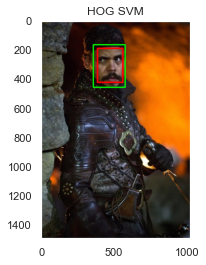

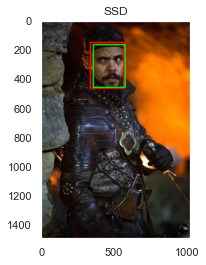

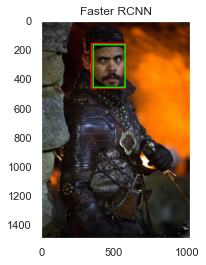

G:\My Drive\CV Project\source_code\SSD\model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_boxes.append(class_decoded_locs[1 - suppress])
G:\My Drive\CV Project\source_code\SSD\model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_scores.append(class_scores[1 - suppress])


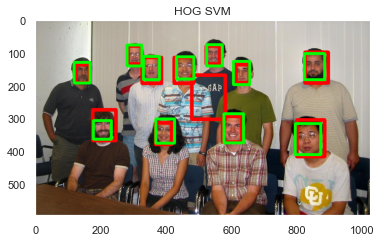

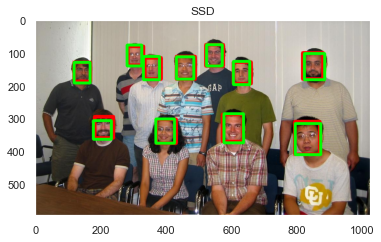

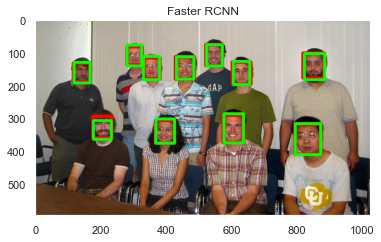

G:\My Drive\CV Project\source_code\SSD\model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_boxes.append(class_decoded_locs[1 - suppress])
G:\My Drive\CV Project\source_code\SSD\model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_scores.append(class_scores[1 - suppress])


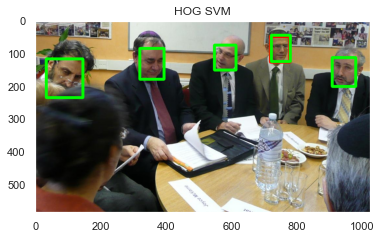

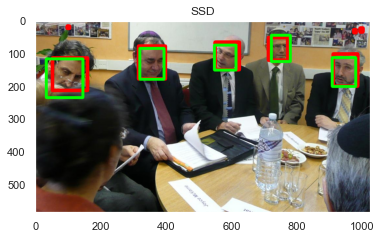

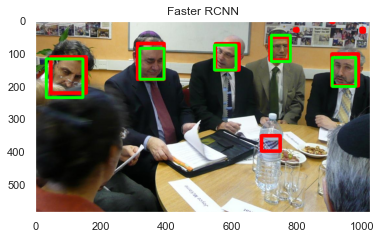

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [118]:
for i in range(len(easy_im_paths)):
    
    #Read our images
    img_name = easy_im_paths[i]
    img_path = os.path.join("./demo_images/easy", img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    # Get the ground truth boxes
    gt_boxes = ground_truth[img_name]
    ground_truth_boxes = []
    for box in gt_boxes:
        x_min, y_min, x_max, y_max = box[0], box[1], box[0] + box[2] ,box[1] + box[3]
        ground_truth_boxes.append([x_min,y_min,x_max,y_max])
    
    hog_svm_image = img.copy()
    ssd_image = img.copy()
    faster_rcnn_image = img.copy()
    
    # Predict the faces using our models
    hog_svm_boxes,_ = svm_detect.detect_multiscale(svm_model,img, downscale = 1.2,confidence_threshold = 0.9)
    ssd_boxes,_ = detect_ssd(model,img, min_score = 0.3)
    faster_rcnn_boxes,_ =  faster_rcnn_detect(faster_rcnn_model, img_path, device, threshold = 0.3)
    
    
    #Draw the bounding boxes. Red for predictions, green for ground truth
    for box in hog_svm_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
        cv2.rectangle(hog_svm_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)
    
    for box in ssd_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
        cv2.rectangle(ssd_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)
    
    for box in faster_rcnn_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) ,int(box[3])
        cv2.rectangle(faster_rcnn_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)
    
    for box in ground_truth_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
        cv2.rectangle(hog_svm_image, (x_min,y_min), (x_max,y_max), (0,255,0), 7)
    
    for box in ground_truth_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
        cv2.rectangle(ssd_image, (x_min,y_min), (x_max,y_max), (0,255,0), 7)
    
    for box in ground_truth_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) ,int(box[3])
        cv2.rectangle(faster_rcnn_image, (x_min,y_min), (x_max,y_max), (0,255,0), 7)
    
    
    plt.imshow(hog_svm_image)
    plt.grid(False)
    plt.title("HOG SVM")
    plt.show()

    
    plt.imshow(ssd_image)
    plt.title("SSD")

    plt.grid(False)
    plt.show()

    
    plt.imshow(faster_rcnn_image)
    plt.title("Faster RCNN")
    plt.grid(False)
    plt.show()


### Let's go some to some medium images

['28_Sports_Fan_Sports_Fan_28_118.jpg', '12_Group_Group_12_Group_Group_12_912.jpg', '55_Sports_Coach_Trainer_sportcoaching_55_773.jpg', '26_Soldier_Drilling_Soldiers_Drilling_26_64.jpg', 'desktop.ini']


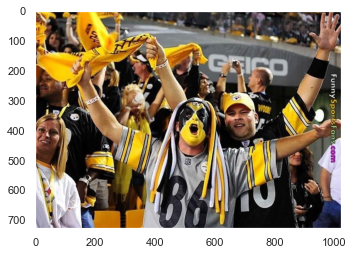

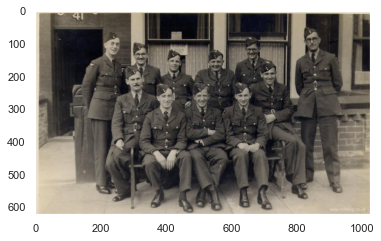

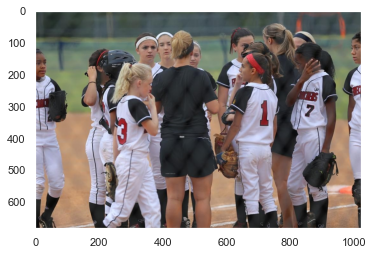

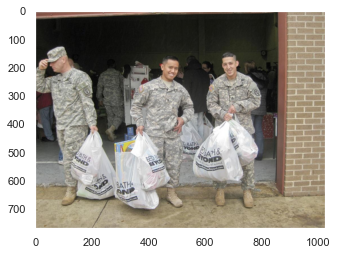

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [119]:
medium_im_paths = os.listdir("./demo_images/medium")
print(medium_im_paths)
for img_name in medium_im_paths:
    img_path = os.path.join("./demo_images/medium", img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    easy_images.append(img)
    plt.imshow(img)
    plt.grid(False)

    plt.show()


G:\My Drive\CV Project\source_code\SSD\model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_boxes.append(class_decoded_locs[1 - suppress])
G:\My Drive\CV Project\source_code\SSD\model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_scores.append(class_scores[1 - suppress])


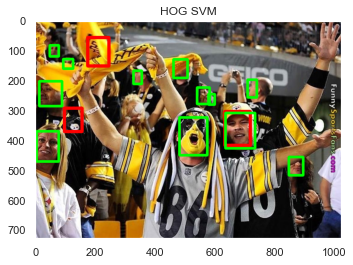

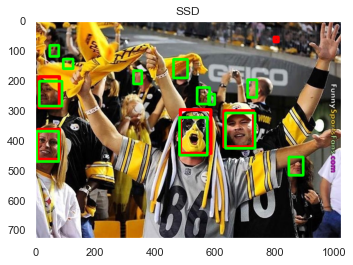

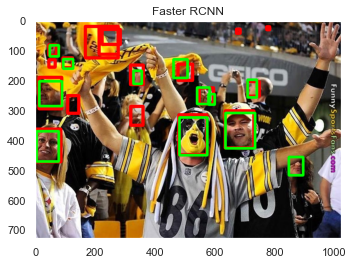

G:\My Drive\CV Project\source_code\SSD\model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_boxes.append(class_decoded_locs[1 - suppress])
G:\My Drive\CV Project\source_code\SSD\model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_scores.append(class_scores[1 - suppress])


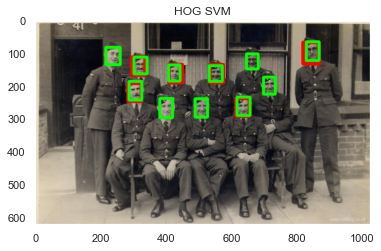

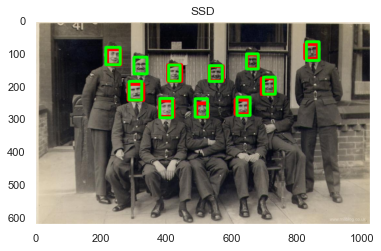

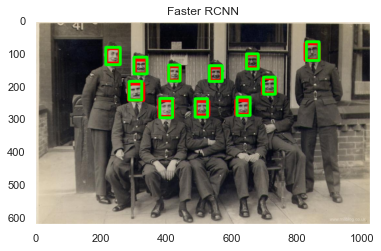

G:\My Drive\CV Project\source_code\SSD\model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_boxes.append(class_decoded_locs[1 - suppress])
G:\My Drive\CV Project\source_code\SSD\model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_scores.append(class_scores[1 - suppress])


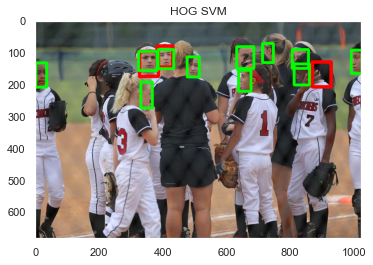

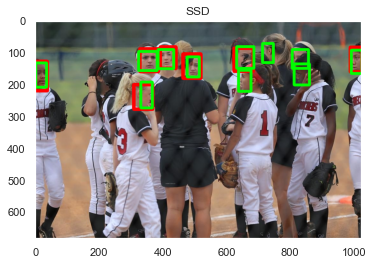

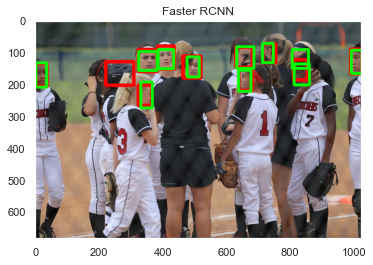

G:\My Drive\CV Project\source_code\SSD\model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_boxes.append(class_decoded_locs[1 - suppress])
G:\My Drive\CV Project\source_code\SSD\model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_scores.append(class_scores[1 - suppress])


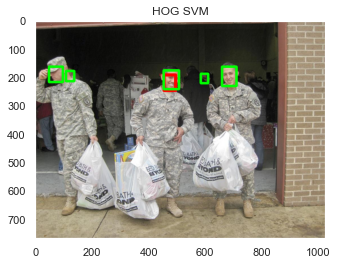

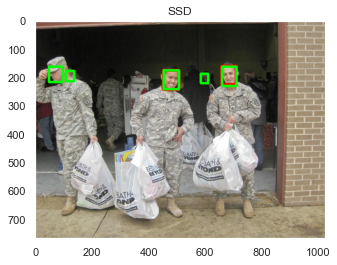

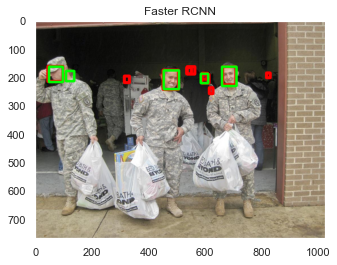

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [120]:
for i in range(len(medium_im_paths)):
    
    #Read our images
    img_name = medium_im_paths[i]
    img_path = os.path.join("./demo_images/medium", img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    # Get the ground truth boxes
    gt_boxes = ground_truth[img_name]
    ground_truth_boxes = []
    for box in gt_boxes:
        x_min, y_min, x_max, y_max = box[0], box[1], box[0] + box[2] ,box[1] + box[3]
        ground_truth_boxes.append([x_min,y_min,x_max,y_max])
    
    hog_svm_image = img.copy()
    ssd_image = img.copy()
    faster_rcnn_image = img.copy()
    
    # Predict the faces using our models
    hog_svm_boxes,_ = svm_detect.detect_multiscale(svm_model,img, downscale = 1.2,confidence_threshold = 0.9)
    ssd_boxes,_ = detect_ssd(model,img, min_score = 0.3)
    faster_rcnn_boxes,_ =  faster_rcnn_detect(faster_rcnn_model, img_path, device, threshold = 0.3)
    
    
    #Draw the bounding boxes. Red for predictions, green for ground truth
    for box in hog_svm_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
        cv2.rectangle(hog_svm_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)
    
    for box in ssd_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
        cv2.rectangle(ssd_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)
    
    for box in faster_rcnn_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) ,int(box[3])
        cv2.rectangle(faster_rcnn_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)
    
    for box in ground_truth_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
        cv2.rectangle(hog_svm_image, (x_min,y_min), (x_max,y_max), (0,255,0), 7)
    
    for box in ground_truth_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
        cv2.rectangle(ssd_image, (x_min,y_min), (x_max,y_max), (0,255,0), 7)
    
    for box in ground_truth_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) ,int(box[3])
        cv2.rectangle(faster_rcnn_image, (x_min,y_min), (x_max,y_max), (0,255,0), 7)
    
    
    plt.imshow(hog_svm_image)
    plt.grid(False)
    plt.title("HOG SVM")
    plt.show()

    
    plt.imshow(ssd_image)
    plt.title("SSD")

    plt.grid(False)
    plt.show()

    
    plt.imshow(faster_rcnn_image)
    plt.title("Faster RCNN")
    plt.grid(False)
    plt.show()


### And some hard images

['0_Parade_marchingband_1_465.jpg', '35_Basketball_basketballgame_ball_35_254.jpg', '39_Ice_Skating_iceskiing_39_359.jpg', '41_Swimming_Swimmer_41_483.jpg', 'desktop.ini']


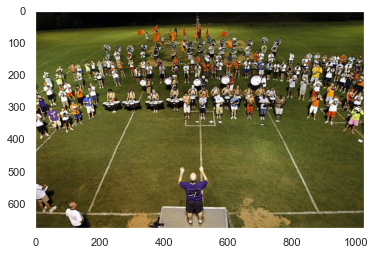

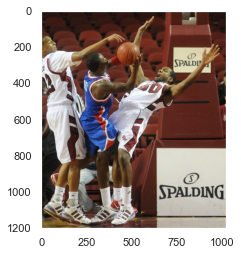

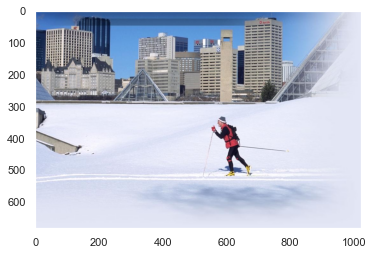

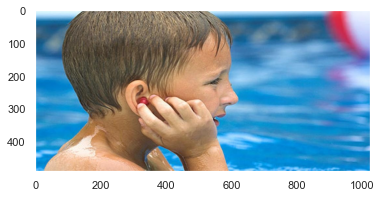

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [121]:
hard_im_paths = os.listdir("./demo_images/hard")
print(hard_im_paths)
for img_name in hard_im_paths:
    img_path = os.path.join("./demo_images/hard", img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.grid(False)

    plt.show()


G:\My Drive\CV Project\source_code\SSD\model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_boxes.append(class_decoded_locs[1 - suppress])
G:\My Drive\CV Project\source_code\SSD\model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_scores.append(class_scores[1 - suppress])


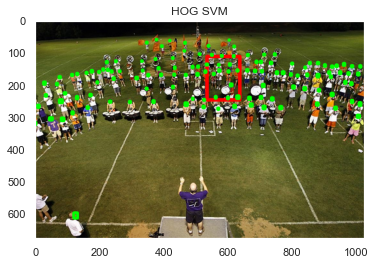

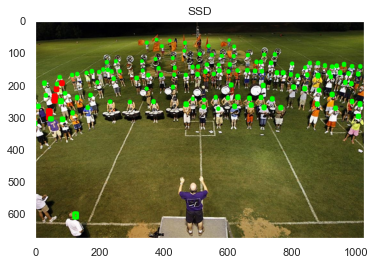

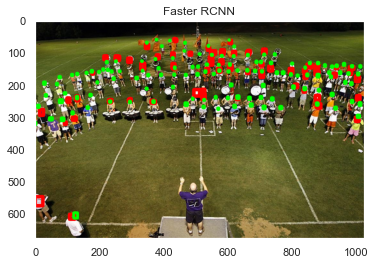

G:\My Drive\CV Project\source_code\SSD\model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_boxes.append(class_decoded_locs[1 - suppress])
G:\My Drive\CV Project\source_code\SSD\model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_scores.append(class_scores[1 - suppress])


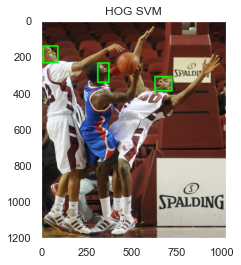

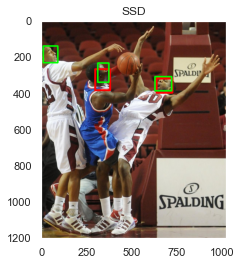

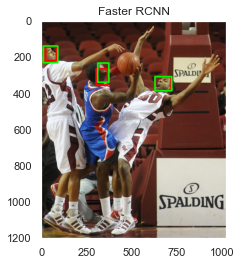

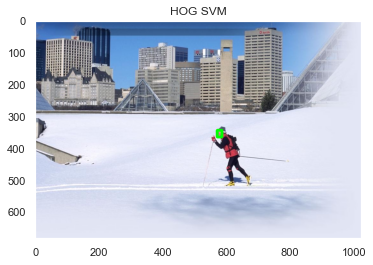

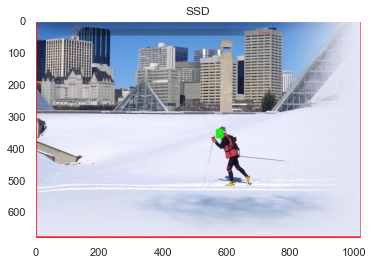

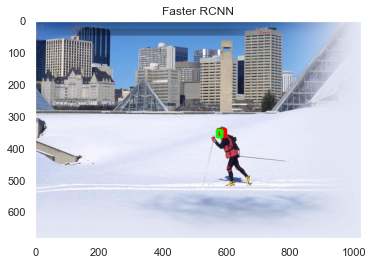

G:\My Drive\CV Project\source_code\SSD\model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_boxes.append(class_decoded_locs[1 - suppress])
G:\My Drive\CV Project\source_code\SSD\model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_scores.append(class_scores[1 - suppress])


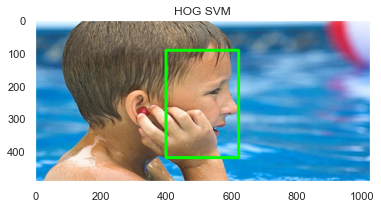

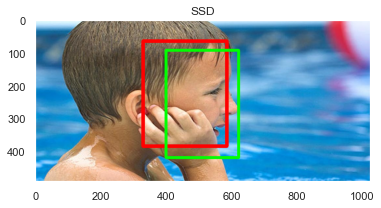

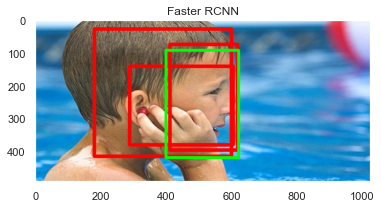

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [122]:
for i in range(len(hard_im_paths)):
    
    #Read our images
    img_name = hard_im_paths[i]
    img_path = os.path.join("./demo_images/hard", img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    # Get the ground truth boxes
    gt_boxes = ground_truth[img_name]
    ground_truth_boxes = []
    for box in gt_boxes:
        x_min, y_min, x_max, y_max = box[0], box[1], box[0] + box[2] ,box[1] + box[3]
        ground_truth_boxes.append([x_min,y_min,x_max,y_max])
    
    hog_svm_image = img.copy()
    ssd_image = img.copy()
    faster_rcnn_image = img.copy()
    
    # Predict the faces using our models
    hog_svm_boxes,_ = svm_detect.detect_multiscale(svm_model,img, downscale = 1.2,confidence_threshold = 0.9)
    ssd_boxes,_ = detect_ssd(model,img, min_score = 0.3)
    faster_rcnn_boxes,_ =  faster_rcnn_detect(faster_rcnn_model, img_path, device, threshold = 0.3)
    
    
    #Draw the bounding boxes. Red for predictions, green for ground truth
    for box in hog_svm_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
        cv2.rectangle(hog_svm_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)
    
    for box in ssd_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
        cv2.rectangle(ssd_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)
    
    for box in faster_rcnn_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) ,int(box[3])
        cv2.rectangle(faster_rcnn_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)
    
    for box in ground_truth_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
        cv2.rectangle(hog_svm_image, (x_min,y_min), (x_max,y_max), (0,255,0), 7)
    
    for box in ground_truth_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
        cv2.rectangle(ssd_image, (x_min,y_min), (x_max,y_max), (0,255,0), 7)
    
    for box in ground_truth_boxes:
        x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) ,int(box[3])
        cv2.rectangle(faster_rcnn_image, (x_min,y_min), (x_max,y_max), (0,255,0), 7)
    
    
    plt.imshow(hog_svm_image)
    plt.grid(False)
    plt.title("HOG SVM")
    hog_svm_image = cv2.cvtColor(hog_svm_image,cv2.COLOR_RGB2BGR)
    plt.show()

    
    plt.imshow(ssd_image)
    plt.title("SSD")

    plt.grid(False)
    ssd_image = cv2.cvtColor(ssd_image,cv2.COLOR_RGB2BGR)
    plt.show()

    
    plt.imshow(faster_rcnn_image)
    plt.title("Faster RCNN")
    plt.grid(False)
    faster_rcnn_image = cv2.cvtColor(faster_rcnn_image,cv2.COLOR_RGB2BGR)
    plt.show()


### We tested our models on other images. You can change the directory to the image you want to try demo

In [123]:
# Insert the img_path here
img_path = "./demo_images/demo_1.jpg"

G:\My Drive\CV Project\source_code\SSD\model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_boxes.append(class_decoded_locs[1 - suppress])
G:\My Drive\CV Project\source_code\SSD\model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_scores.append(class_scores[1 - suppress])


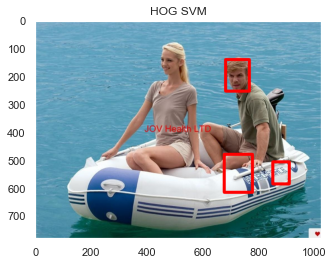

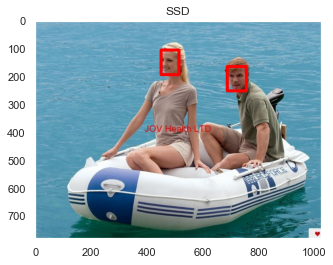

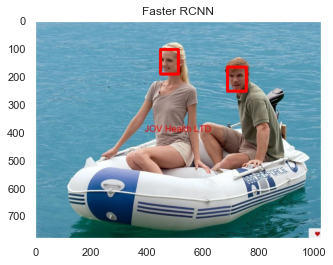

In [124]:
# Read the image
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


# Get the model's predictions
hog_svm_boxes,_ = svm_detect.detect_multiscale(svm_model,img, downscale = 1.2,confidence_threshold = 0.8)
ssd_boxes,_ = detect_ssd(model,img, min_score = 0.3)
faster_rcnn_boxes,_ =  faster_rcnn_detect(faster_rcnn_model, img_path, device, threshold = 0.3)


#Draw the bounding boxes. Red for predictions, green for ground truth
hog_svm_image = img.copy()
ssd_image = img.copy()
faster_rcnn_image = img.copy()
    

for box in hog_svm_boxes:
    x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
    cv2.rectangle(hog_svm_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)

for box in ssd_boxes:
    x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
    cv2.rectangle(ssd_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)

for box in faster_rcnn_boxes:
    x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) ,int(box[3])
    cv2.rectangle(faster_rcnn_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)

plt.imshow(hog_svm_image)
plt.grid(False)
plt.title("HOG SVM")
plt.show()


plt.imshow(ssd_image)
plt.title("SSD")

plt.grid(False)
plt.show()


plt.imshow(faster_rcnn_image)
plt.title("Faster RCNN")
plt.grid(False)
plt.show()


In [125]:
# Insert the img_path here
img_path = "./demo_images/demo_2.jpg"

G:\My Drive\CV Project\source_code\SSD\model.py:492: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_boxes.append(class_decoded_locs[1 - suppress])
G:\My Drive\CV Project\source_code\SSD\model.py:494: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  image_scores.append(class_scores[1 - suppress])


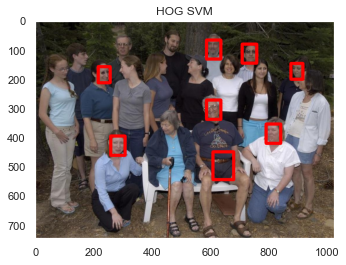

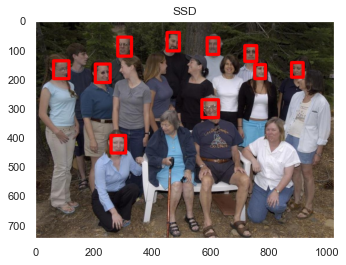

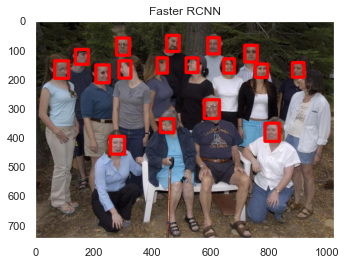

In [126]:
# Read the image
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


# Get the model's predictions
hog_svm_boxes,_ = svm_detect.detect_multiscale(svm_model,img, downscale = 1.2,confidence_threshold = 0.8)
ssd_boxes,_ = detect_ssd(model,img, min_score = 0.3)
faster_rcnn_boxes,_ =  faster_rcnn_detect(faster_rcnn_model, img_path, device, threshold = 0.3)


#Draw the bounding boxes. Red for predictions, green for ground truth
hog_svm_image = img.copy()
ssd_image = img.copy()
faster_rcnn_image = img.copy()
    

for box in hog_svm_boxes:
    x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
    cv2.rectangle(hog_svm_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)

for box in ssd_boxes:
    x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) , int(box[3])
    cv2.rectangle(ssd_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)

for box in faster_rcnn_boxes:
    x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]) ,int(box[3])
    cv2.rectangle(faster_rcnn_image, (x_min,y_min), (x_max,y_max), (255,0,0), 10)

plt.imshow(hog_svm_image)
plt.grid(False)
plt.title("HOG SVM")
plt.show()


plt.imshow(ssd_image)
plt.title("SSD")

plt.grid(False)
plt.show()


plt.imshow(faster_rcnn_image)
plt.title("Faster RCNN")
plt.grid(False)
plt.show()
